# Preliminary Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/interstellar_travel.csv'

df = pd.read_csv(file_path)

In [ ]:
df.head()

,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Booking Date,Departure Date,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score
0,14,Female,Colonist,Business,Gliese 581,Cunningham Mountains,1.09,11.0,5,Tourism,Warp Drive,828.949275,2023-09-17,2025-01-07,Other,No,9,105.0
1,22,Male,Tourist,Economy,Alpha Centauri,Hayes Trace,5.70,23.0,0,Research,Solar Sailing,488.469135,2023-03-31,2025-12-26,Other,No,3,102.0
2,62,Female,Businessperson,Luxury,Alpha Centauri,Anna Port,0.37,4.0,1,Tourism,Ion Thruster,183.745881,2022-05-19,2025-01-04,NaN,Yes,5,100.0
3,21,Female,Colonist,Economy,Lalande 21185,Henry Ville,0.32,23.0,1,Tourism,Warp Drive,358.754000,2023-04-13,2024-02-09,NaN,No,4,108.0
4,42,Male,Explorer,Luxury,Exotic Destination 10,Graves Mall,6.17,42.0,1,Colonization,Ion Thruster,3073.759920,2023-06-12,2024-03-15,Special Meal,No,6,97.0


In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Occupation,object
Travel Class,object
Destination,object
Star System,object
Distance to Destination (Light-Years),float64
Duration of Stay (Earth Days),float64
Number of Companions,int64
Purpose of Travel,object


In [ ]:
df.describe()

,Age,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Price (Galactic Credits),Month,Customer Satisfaction Score
count,547568.000000,547568.000000,547568.00000,547568.000000,547568.000000,547568.000000,547568.000000
mean,31.097029,8.333134,33.97513,1.107523,1034.273413,6.516975,101.660112
std,19.668694,24.073530,33.35670,1.094676,1384.904184,3.454901,9.292661
min,0.000000,0.000000,0.00000,0.000000,-6171.142478,1.000000,32.250000
25%,16.000000,0.980000,11.00000,0.000000,271.827658,4.000000,100.000000
50%,27.000000,2.710000,22.00000,1.000000,634.563876,7.000000,102.000000
75%,43.000000,7.450000,47.00000,2.000000,1306.127813,10.000000,107.000000
max,99.000000,2625.910000,426.00000,13.000000,103134.110795,12.000000,115.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547568 entries, 0 to 547567
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Age                                    547568 non-null  int64  
 1   Gender                                 547568 non-null  object 
 2   Occupation                             547568 non-null  object 
 3   Travel Class                           547568 non-null  object 
 4   Destination                            547568 non-null  object 
 5   Star System                            547568 non-null  object 
 6   Distance to Destination (Light-Years)  547568 non-null  float64
 7   Duration of Stay (Earth Days)          547568 non-null  float64
 8   Number of Companions                   547568 non-null  int64  
 9   Purpose of Travel                      547568 non-null  object 
 10  Transportation Type                    547568 non-null  

# EDA

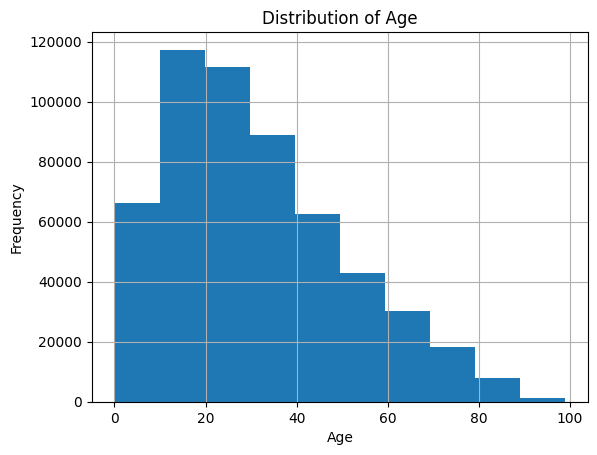

In [ ]:
import matplotlib.pyplot as plt

df['Age'].hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
price_stats = df['Price (Galactic Credits)'].describe()
print(price_stats)




count    547568.000000
mean       1034.273413
std        1384.904184
min       -6171.142478
25%         271.827658
50%         634.563876
75%        1306.127813
max      103134.110795
Name: Price (Galactic Credits), dtype: float64


In [237]:
negative_price_rows = df[df['Price (Galactic Credits)'] < 0]
len(negative_price_rows)

30312

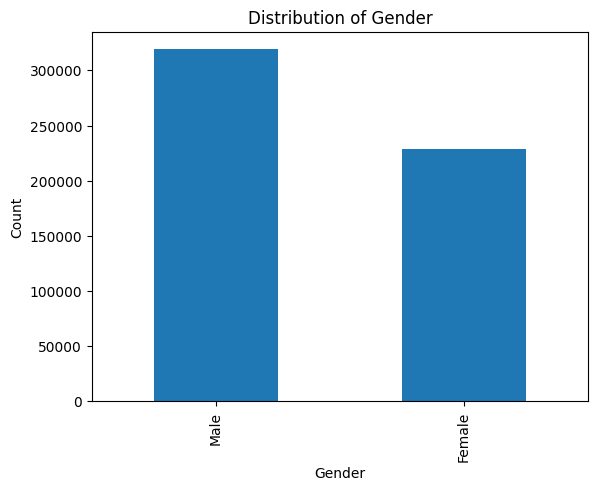

In [ ]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### Analysis of Correlation Matrix

#### Correlation Values:

1. **Distance to Destination (Light-Years) vs. Price (Galactic Credits)**:
   - **Correlation Coefficient**: **0.55**
   - **Interpretation**: There is a moderate positive correlation between the distance to the destination and the price. This suggests that, on average, as the distance to the destination increases, the price of the travel also tends to increase. However, the relationship is not perfectly linear.

2. **Distance to Destination (Light-Years) vs. Duration of Stay (Earth Days)**:
   - **Correlation Coefficient**: **0.07**
   - **Interpretation**: The correlation is very weak and close to zero. This indicates that there is almost no linear relationship between the distance to the destination and the duration of stay. Changes in distance do not significantly affect the length of the stay.

3. **Price (Galactic Credits) vs. Duration of Stay (Earth Days)**:
   - **Correlation Coefficient**: **0.05**
   - **Interpretation**: There is a very weak positive correlation between the price and the duration of stay. This means that the price of travel has little to no relationship with how long the stay is. The duration of stay does not significantly influence the price.

#### Summary:

- **Distance and Price**: There's a moderate positive relationship. Higher distances generally lead to higher prices, likely due to increased travel costs.
- **Distance and Duration**: No significant relationship. Distance does not affect the duration of stay.
- **Price and Duration**: Very weak correlation. Price and duration of stay are not strongly related, meaning the cost of travel is not heavily influenced by the length of the stay.

### Implications:

- **Pricing Strategy**: Given the moderate correlation between distance and price, it is reasonable to factor in distance when setting prices.
- **Travel Duration**: Since there's no strong correlation between distance or price and duration of stay, pricing and travel plans might be independent of how long travelers stay at their destinations.
- **Further Analysis**: Consider exploring additional factors or features that might affect the duration of stay or price, such as travel class, special requests, or loyalty program membership.


Correlation Matrix:


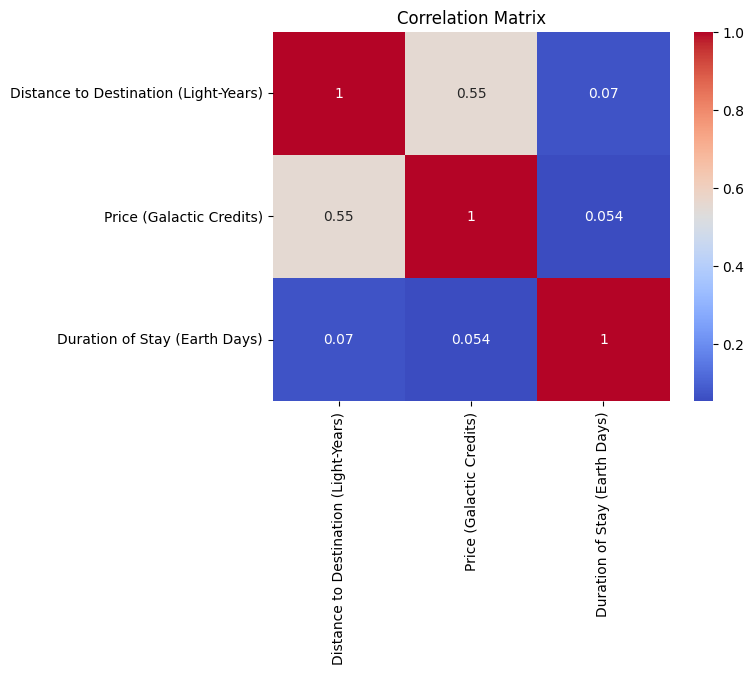

In [ ]:
corr = df[['Distance to Destination (Light-Years)', 'Price (Galactic Credits)', 'Duration of Stay (Earth Days)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
print("Correlation Matrix:")

plt.title('Correlation Matrix')
plt.show()


**Key Observations:**

**Business Class:**

**Non-Members:** 86,562

**Members:** 87,199

**Observation:** The number of business class travelers is almost evenly split between members and non-members. However, there are slightly more business class travelers who are loyalty program members.


**Economy Class:**

**Non-Members:** 155,471

**Members:** 145,208

**Observation:** Economy class travelers are more likely to be non-members than members. The number of non-members is significantly higher than the number of members in this class.

**Luxury Class:**

**Non-Members:** 20,154

**Members:** 52,974

**Observation:** There is a substantial number of luxury class travelers who are loyalty program members compared to non-members. This indicates that a higher proportion of luxury class travelers are likely to be part of the loyalty program.

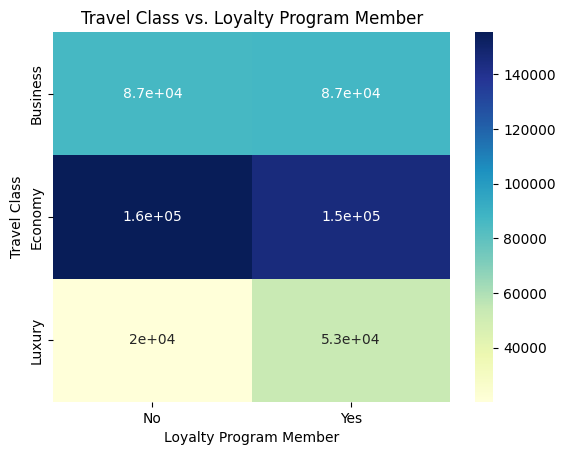

In [ ]:
cross_tab = pd.crosstab(df['Travel Class'], df['Loyalty Program Member'])

sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title('Travel Class vs. Loyalty Program Member')
plt.show()


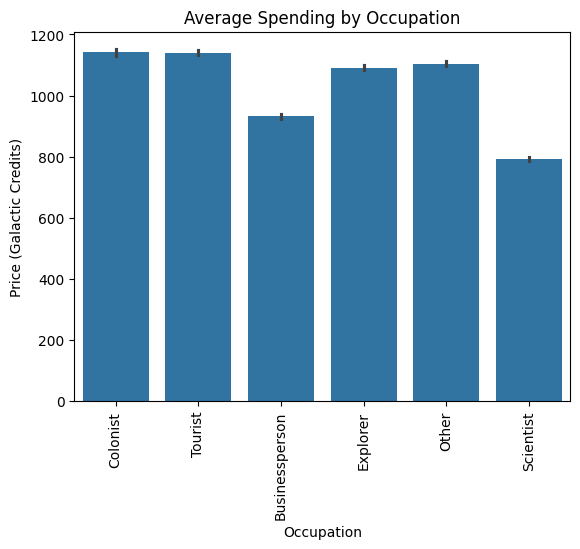

In [ ]:
sns.barplot(x='Occupation', y='Price (Galactic Credits)', data=df)
plt.title('Average Spending by Occupation')
plt.xticks(rotation=90)
plt.show()

# Data Cleaning and Preperation



### 1.   Handling Missing Values



In [ ]:
df['Special Requests'].fillna('None', inplace=True)




### 2.   Convert Data Types



In [ ]:
df['Booking Date'] = pd.to_datetime(df['Booking Date'])
df['Departure Date'] = pd.to_datetime(df['Departure Date'])


## 3. Handling Categorical Values
Based on the provided DataFrame, the following columns are categorical:

1. **Travel Class**
2. **Gender**
3. **Transportation Type**
4. **Loyalty Program Member**
5. **Purpose of Travel**
6. **Star System**
7. **Destination**
8. **Occupation**










### 1.   Travel Class



In [ ]:
df['Travel Class'].value_counts()

,count
Travel Class,
Economy,300679
Business,173761
Luxury,73128


In [ ]:
travel_class_mapping = {
    'Economy': 1,
    'Business': 2,
    'Luxury': 3
}

In [ ]:
df['Travel Class Encoded'] = df['Travel Class'].map(travel_class_mapping)


In [ ]:
df['Travel Class Encoded'].value_counts()

,count
Travel Class Encoded,
1,300679
2,173761
3,73128




### 2. Gender


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,319005
Female,228563


In [ ]:
gender_mapping = {
    'Male': 0,
    'Female': 1
}

In [ ]:
df['Gender Encoded'] = df['Gender'].map(gender_mapping)


In [ ]:
df['Gender Encoded'].value_counts()

,count
Gender Encoded,
0,319005
1,228563


###3. Transportation Type

In [ ]:
df['Transportation Type'].value_counts()

,count
Transportation Type,
Solar Sailing,137266
Other,136855
Ion Thruster,136808
Warp Drive,136639


In [ ]:

df = pd.get_dummies(df, columns=['Transportation Type'], prefix='Transport')


In [ ]:
df.head()

,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,...,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score,Travel Class Encoded,Gender Encoded,Transport_Ion Thruster,Transport_Other,Transport_Solar Sailing,Transport_Warp Drive
0,14,Female,Colonist,Business,Gliese 581,Cunningham Mountains,1.09,11.0,5,Tourism,...,Other,No,9,105.0,2,1,False,False,False,True
1,22,Male,Tourist,Economy,Alpha Centauri,Hayes Trace,5.70,23.0,0,Research,...,Other,No,3,102.0,1,0,False,False,True,False
2,62,Female,Businessperson,Luxury,Alpha Centauri,Anna Port,0.37,4.0,1,Tourism,...,None,Yes,5,100.0,3,1,True,False,False,False
3,21,Female,Colonist,Economy,Lalande 21185,Henry Ville,0.32,23.0,1,Tourism,...,None,No,4,108.0,1,1,False,False,False,True
4,42,Male,Explorer,Luxury,Exotic Destination 10,Graves Mall,6.17,42.0,1,Colonization,...,Special Meal,No,6,97.0,3,0,True,False,False,False


### 4. Loyalty Program Member

In [ ]:
df['Loyalty Program Member'].value_counts()

,count
Loyalty Program Member,
Yes,285381
No,262187


In [ ]:
df['Loyalty Program Member Encoded'] = df['Loyalty Program Member'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
df['Loyalty Program Member Encoded'].value_counts()

,count
Loyalty Program Member Encoded,
1,285381
0,262187


### 5. Purpose of Travel

In [ ]:
df['Purpose of Travel'].value_counts()

,count
Purpose of Travel,
Tourism,109744
Research,109650
Business,109557
Other,109455
Colonization,109162


In [ ]:
df = pd.get_dummies(df, columns=['Purpose of Travel'], prefix='Purpose')


In [ ]:
prefix = ("Purpose_")
purpose_columns = df.filter(like=prefix)
purpose_columns


,Purpose_Business,Purpose_Colonization,Purpose_Other,Purpose_Research,Purpose_Tourism
0,False,False,False,False,True
1,False,False,False,True,False
2,False,False,False,False,True
3,False,False,False,False,True
4,False,True,False,False,False
...,...,...,...,...,...
547563,False,False,False,True,False
547564,True,False,False,False,False
547565,False,False,True,False,False
547566,False,False,False,False,True


###6. Star System

In [ ]:
df['Star System'].value_counts()

,count
Star System,
Michael Port,73
Michael Summit,71
Michael Springs,68
Smith Summit,67
Smith Drive,65
...,...
Hancock Stravenue,1
Hogan Ways,1
Armstrong Trace,1


In [ ]:
frequency = df['Star System'].value_counts()
df['Star System Frequency Encoded'] = df['Star System'].map(frequency)

In [ ]:
df[['Star System', 'Star System Frequency Encoded']]

,Star System,Star System Frequency Encoded
0,Cunningham Mountains,3
1,Hayes Trace,3
2,Anna Port,7
3,Henry Ville,3
4,Graves Mall,3
...,...,...
547563,Peterson Pike,3
547564,Ronald Row,4
547565,John Lane,24
547566,Elizabeth Mountain,24


### 7. Destination

In [ ]:
df['Destination'].nunique()

20

In [ ]:
df = pd.get_dummies(df, columns=['Destination'],prefix='Destination')


In [ ]:
prefix = ("Destination_")
destination_columns = df.filter(like=prefix)
destination_columns

,Destination_Alpha Centauri,Destination_Barnard's Star,Destination_Epsilon Eridani,Destination_Exotic Destination 1,Destination_Exotic Destination 10,Destination_Exotic Destination 2,Destination_Exotic Destination 3,Destination_Exotic Destination 4,Destination_Exotic Destination 5,Destination_Exotic Destination 6,Destination_Exotic Destination 7,Destination_Exotic Destination 8,Destination_Exotic Destination 9,Destination_Gliese 581,Destination_Kepler-22b,Destination_Lalande 21185,Destination_Proxima Centauri,Destination_Tau Ceti,Destination_Trappist-1,Destination_Zeta II Reticuli
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547563,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
547564,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
547565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
547566,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### 8. Occupation

In [ ]:
df['Occupation'].value_counts()

,count
Occupation,
Tourist,92049
Businessperson,91327
Colonist,91198
Other,91194
Explorer,91005
Scientist,90795


In [ ]:
df = pd.get_dummies(df, columns=['Occupation'])


In [ ]:
prefix = ("Occupation_")
occupation_columns = df.filter(like=prefix)
occupation_columns


,Occupation_Businessperson,Occupation_Colonist,Occupation_Explorer,Occupation_Other,Occupation_Scientist,Occupation_Tourist
0,False,True,False,False,False,False
1,False,False,False,False,False,True
2,True,False,False,False,False,False
3,False,True,False,False,False,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
547563,False,False,False,False,True,False
547564,False,False,False,False,False,True
547565,False,True,False,False,False,False
547566,False,False,False,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547568 entries, 0 to 547567
Data columns (total 53 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Age                                    547568 non-null  int64         
 1   Gender                                 547568 non-null  object        
 2   Travel Class                           547568 non-null  object        
 3   Star System                            547568 non-null  object        
 4   Distance to Destination (Light-Years)  547568 non-null  float64       
 5   Duration of Stay (Earth Days)          547568 non-null  float64       
 6   Number of Companions                   547568 non-null  int64         
 7   Price (Galactic Credits)               547568 non-null  float64       
 8   Booking Date                           547568 non-null  datetime64[ns]
 9   Departure Date                         547568 no

In [ ]:
# Extract month from 'Departure Date'
df['Extracted Month'] = df['Booking Date'].dt.month

# Compare 'Extracted Month' with 'Month'
df['Month Match'] = df['Extracted Month'] == df['Month']

In [ ]:
df['Month Match'].value_counts()

,count
Month Match,
True,547568


In [ ]:
df = df.drop(columns=['Month'])
df = df.drop(columns=['Month Match'])
df = df.drop(columns=['Extracted Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547568 entries, 0 to 547567
Data columns (total 52 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Age                                    547568 non-null  int64         
 1   Gender                                 547568 non-null  object        
 2   Travel Class                           547568 non-null  object        
 3   Star System                            547568 non-null  object        
 4   Distance to Destination (Light-Years)  547568 non-null  float64       
 5   Duration of Stay (Earth Days)          547568 non-null  float64       
 6   Number of Companions                   547568 non-null  int64         
 7   Price (Galactic Credits)               547568 non-null  float64       
 8   Booking Date                           547568 non-null  datetime64[ns]
 9   Departure Date                         547568 no

# Analysing Trends in Intersteller Travel

## Price Analysis
#### Booking Date
Here I use the **booking date** to see if travel prices fluctuate throughout the year.



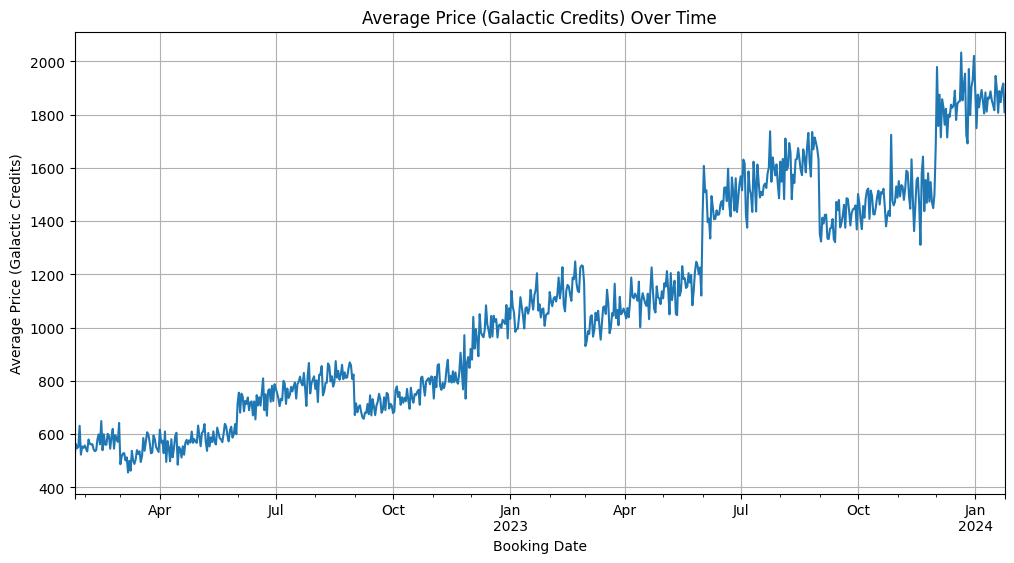

In [243]:
df_filtered = df[df['Price (Galactic Credits)'] >= 0]

price_trend = df_filtered.groupby('Booking Date')['Price (Galactic Credits)'].mean()


plt.figure(figsize=(12, 6))
price_trend.plot()
plt.title('Average Price (Galactic Credits) Over Time')
plt.xlabel('Booking Date')
plt.ylabel('Average Price (Galactic Credits)')
plt.grid(True)
plt.show()


#### Travel Class Analysis

In this analysis, we explore how the average price varies by travel class. By grouping the data based on the travel class (e.g., Economy, Business, First Class), we can determine if the price increases are concentrated in specific classes.




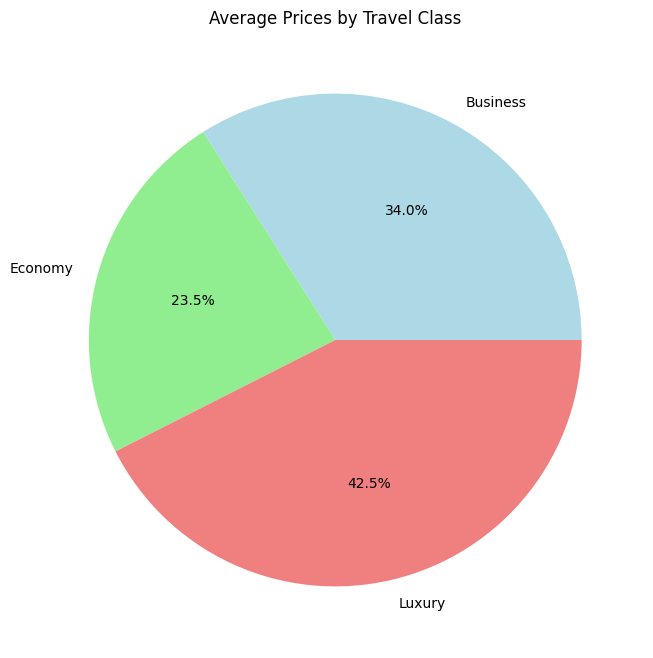

In [244]:

import matplotlib.pyplot as plt

travel_class_prices = df_filtered.groupby('Travel Class')['Price (Galactic Credits)'].mean()


plt.figure(figsize=(8, 8))
plt.pie(travel_class_prices, labels=travel_class_prices.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Average Prices by Travel Class')
plt.show()



#### Price Trends by Travel Class

The data reveals distinct pricing trends across different travel classes:

- **Luxury Class** has the highest average price, which aligns with its premium status and the likely inclusion of high-end amenities.
- **Business Class** falls in between Economy and Luxury, suggesting it offers more comfort and services than Economy but less than Luxury.
- **Economy Class** is the most affordable, catering to price-sensitive travelers.

**Conclusion:**

The significant price difference between classes indicates a clear tiered pricing strategy, where travelers pay more for additional comfort and services. This tiered structure helps segment customers based on their budget and preferences.

If you observe a rising trend in overall prices, it could be due to increased costs in higher travel classes or general price adjustments across all classes. Understanding these trends helps tailor marketing strategies, manage customer expectations, and adjust pricing strategies accordingly.

#### Monthly Average Prices Trend Analysis

Here I investigate whether the price trend is seasonal by grouping data by year and month. This analysis can reveal if prices rise during specific times of the year.



<Figure size 1400x700 with 0 Axes>

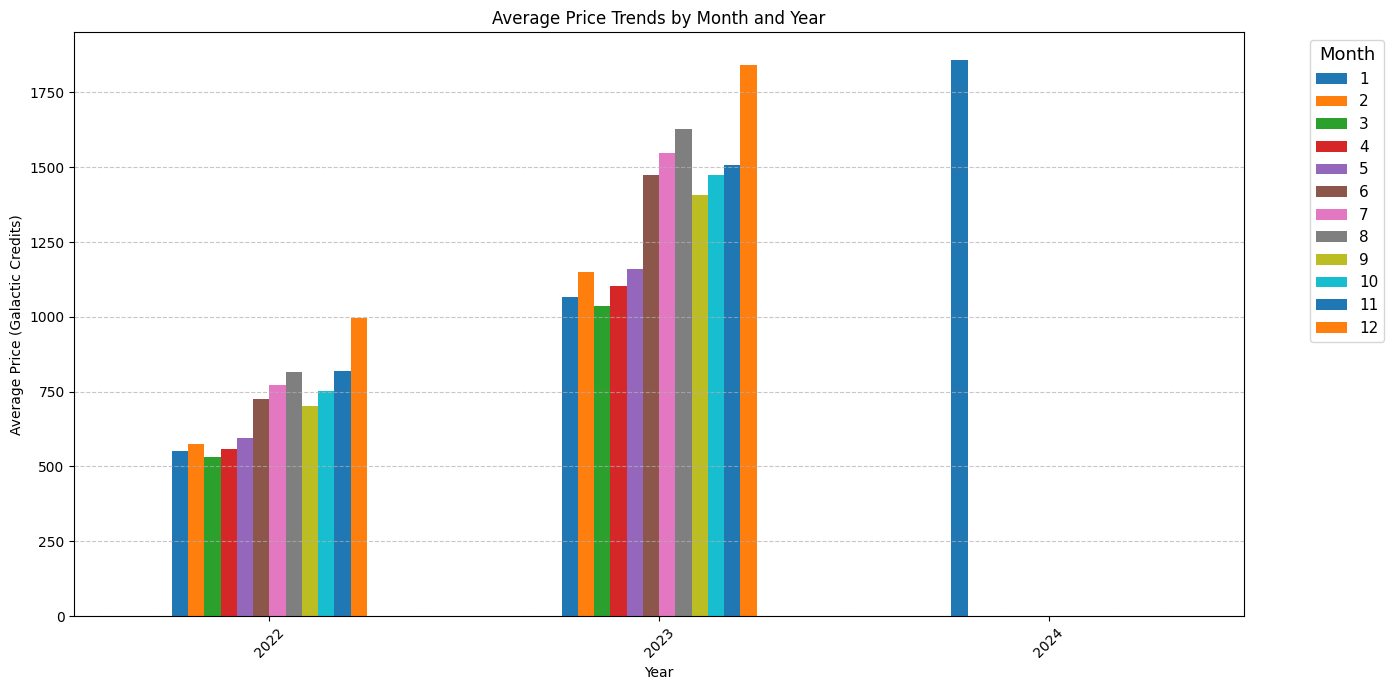

In [245]:

df['Month'] = df['Booking Date'].dt.month
df['Year'] = df['Booking Date'].dt.year

monthly_prices = df_filtered.groupby(['Year', 'Month'])['Price (Galactic Credits)'].mean().unstack()

plt.figure(figsize=(14, 7))
monthly_prices.plot(kind='bar', figsize=(14, 7))
plt.title('Average Price Trends by Month and Year')
plt.xlabel('Year')
plt.ylabel('Average Price (Galactic Credits)')
plt.legend(title='Month', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




**Data Overview**

The dataset provides average prices (in Galactic Credits) for travel over different months and years. The data includes prices for the years 2022, 2023, and 2024.

**Monthly Average Prices**
**2022**

- **January to May**: Prices start at 280.24 Galactic Credits in January and gradually increase, reaching 461.99 Galactic Credits by May.
- **June to December**: Prices continue to rise, with notable peaks in July (690.18 Galactic Credits) and December (997.06 Galactic Credits).

**Monthly Average Prices 2023**

- **January to May**: There is a significant increase in prices compared to 2022, starting at 1067.71 Galactic Credits in January and reaching 1160.96 Galactic Credits by May.
- **June to December**: Prices remain high with a peak in December at 1842.34 Galactic Credits. The lowest point is observed in September at 1405.99 Galactic Credits.

**Monthly Average Prices 2024**

- **Data Availability**: Limited data is available for 2024, showing prices for January only (1857.92 Galactic Credits). The rest of the year is not yet available or recorded.

 **Key Observations**

1. **Rising Trend**: There is a clear upward trend in average prices from 2022 to 2023, indicating a significant increase in travel costs over the period.
2. **Seasonal Variation**: Both years show a tendency for prices to peak during the middle and end of the year, with notable highs in summer and winter months.
3. **High Prices in 2024**: The initial data for 2024 suggests a continued increase in travel prices, though complete yearly data is not yet available for full analysis.

 **Implications**

- **Revenue Forecasting:** The increase in prices and seasonal peaks suggest an opportunity to forecast higher revenues, particularly in peak months like July and December.
- **Strategic Planning:** Early booking incentives or promotions might help capture market share before prices peak, while also managing demand more effectively during high-price periods.






#### Price Analysis based on Destination

In [246]:
import pandas as pd
import numpy as np


destination_columns = df_filtered.filter(like='Destination_').columns.tolist()


df_melted = df_filtered.melt(id_vars=['Price (Galactic Credits)'], value_vars=destination_columns,
                    var_name='Destination', value_name='Is_Destination')


df_filtered_1 = df_melted[df_melted['Is_Destination'] == True]


destination_price_stats = df_filtered_1.groupby('Destination').agg({
    'Price (Galactic Credits)': ['min', 'max', 'mean', 'median']
}).reset_index()


destination_price_stats


Destination Price (Galactic Credits)                 \
                                                           min            max   
0          Destination_Alpha Centauri                 0.365904  103134.110795   
1          Destination_Barnard's Star                 0.000000   59192.527918   
2         Destination_Epsilon Eridani                 0.000000   35793.600150   
3    Destination_Exotic Destination 1                 0.935550   21450.000600   
4   Destination_Exotic Destination 10                 0.548100   18034.070000   
5    Destination_Exotic Destination 2                 0.632016   22208.437440   
6    Destination_Exotic Destination 3                 0.891000   20378.034000   
7    Destination_Exotic Destination 4                 0.180000   23828.883750   
8    Destination_Exotic Destination 5                 0.332640   19252.930620   
9    Destination_Exotic Destination 6                 0.300300   22356.252000   
10   Destination_Exotic Destination 7                 0.207900   14285.347650   
11   Destination_Exotic Destination 8                 0.424116   26035.801050   
12   Destination_Exotic Destination 9                 0.693000   15013.809878   
13             Destination_Gliese 581                 0.092978   53433.041162   
14             Destination_Kepler-22b                 0.242550   39324.363540   
15          Destination_Lalande 21185                 0.000000   33784.013450   
16       Destination_Proxima Centauri                 0.162162   31271.644404   
17               Destination_Tau Ceti                 0.000000   25816.978757   
18             Destination_Trappist-1                 0.279510   48110.655120   
19       Destination_Zeta II Reticuli                 0.000000   30287.509214   

                             
           mean      median  
0   1368.588877  860.661263  
1   1032.781932  644.593950  
2   1039.519543  653.431259  
3    967.889546  605.943450  
4    957.033475  595.728000  
5    944.005648  594.090000  
6    957.099388  598.997936  
7    937.757104  584.721217  
8    940.067654  599.680725  
9    950.936912  597.168000  
10   916.709719  585.434850  
11   926.124641  575.724240  
12   924.327736  583.416960  
13  1029.220349  645.821715  
14  1232.831225  777.673368  
15  1033.818512  646.380851  
16  1043.323921  650.727000  
17  1027.568388  646.277940  
18  1365.049112  857.729941  
19  1039.504676  647.698425

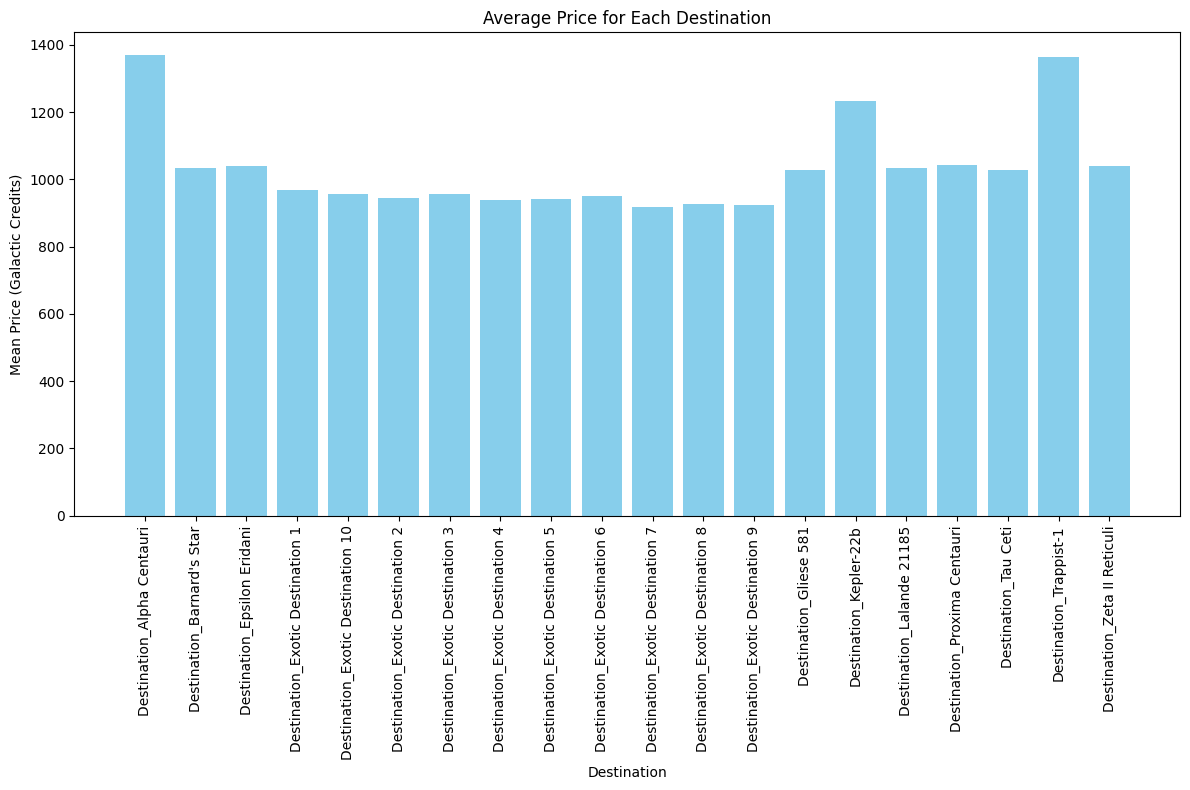

In [247]:
import pandas as pd
import numpy as np

destination_columns = df.filter(like='Destination_').columns.tolist()

df_melted = df_filtered.melt(id_vars=['Price (Galactic Credits)'], value_vars=destination_columns,
                    var_name='Destination', value_name='Is_Destination')

df_filtered = df_melted[df_melted['Is_Destination'] == True]

destination_price_mean = df_filtered.groupby('Destination').agg({
    'Price (Galactic Credits)': 'mean'
}).reset_index()


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(destination_price_mean['Destination'], destination_price_mean['Price (Galactic Credits)'], color='skyblue')

plt.xticks(rotation=90)


plt.title('Average Price for Each Destination')
plt.xlabel('Destination')
plt.ylabel('Mean Price (Galactic Credits)')

plt.tight_layout()
plt.show()



### Travel Destination Analysis

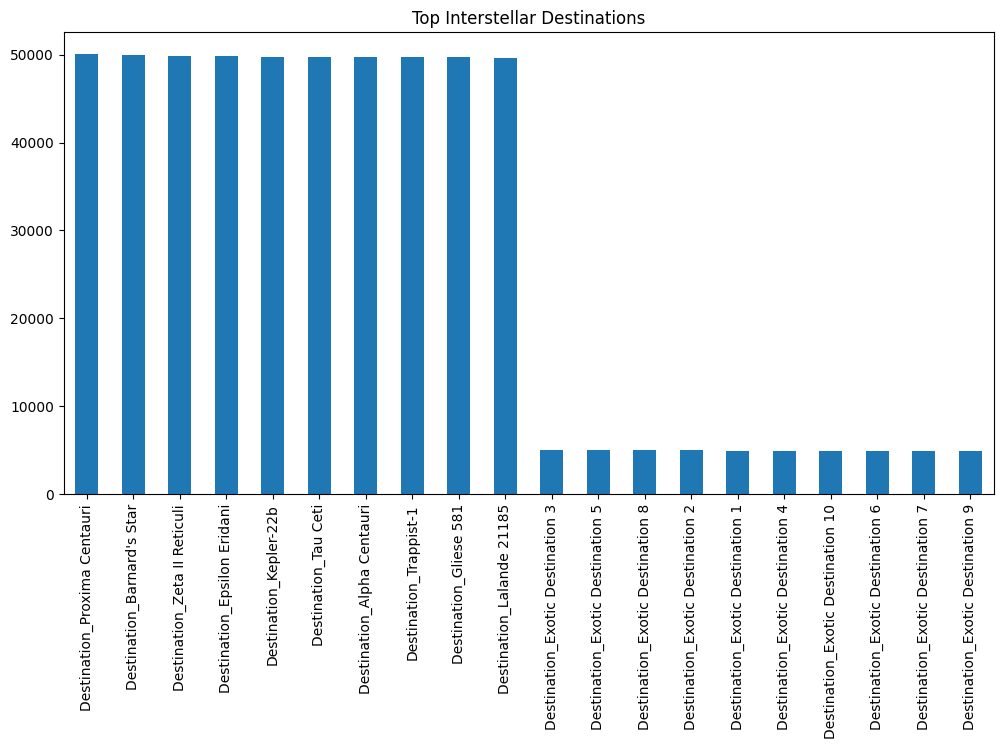

In [ ]:
destination_columns = [col for col in df.columns if 'Destination_' in col]
destination_trends = df[destination_columns].sum().sort_values(ascending=False)

destination_trends.plot(kind='bar', figsize=(12, 6))
plt.title('Top Interstellar Destinations')
plt.show()


### Transport Types

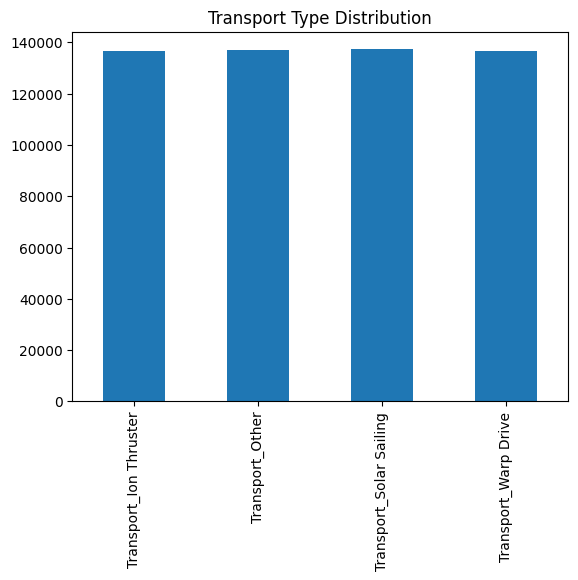

In [ ]:
transport_counts = df.filter(like='Transport_').sum()
transport_counts.plot(kind='bar', title='Transport Type Distribution')
plt.show()


### Travel Class

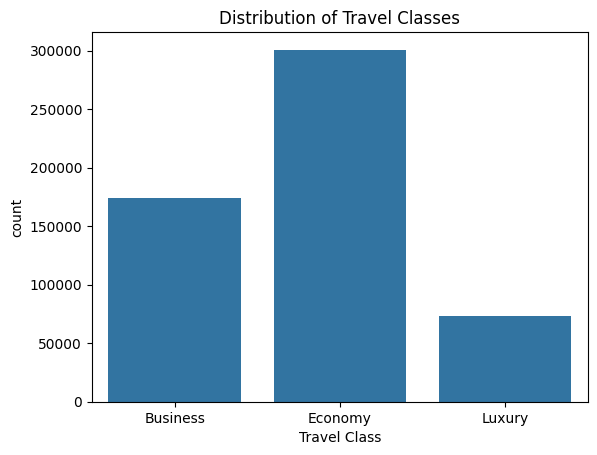

In [ ]:
import seaborn as sns

# Travel Class distribution
sns.countplot(x='Travel Class', data=df)
plt.title('Distribution of Travel Classes')
plt.show()


### Satisfaction Score Analysis

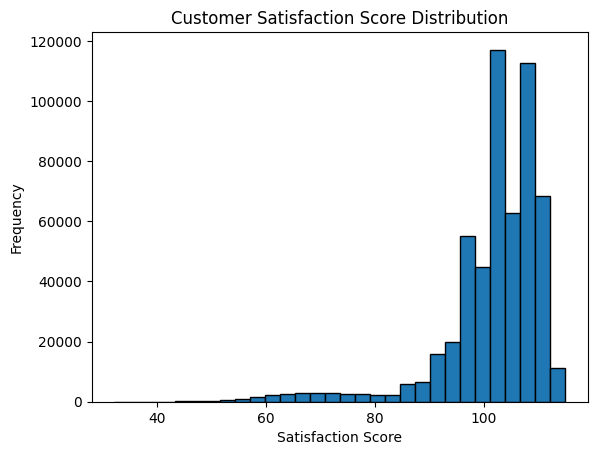

In [ ]:
# Satisfaction score distribution
plt.hist(df['Customer Satisfaction Score'], bins=30, edgecolor='k')
plt.title('Customer Satisfaction Score Distribution')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()



#### Analysis of Customer Satisfaction Scores

**2022 Trends:**
- **Early Year**: Scores started around 95 and increased to about 99 by May.
- **Mid-Year**: Satisfaction peaked in the summer, reaching over 104 in September and October.
- **End of Year**: Scores remained high at around 104 through the last months.

**2023 Trends:**
- **Consistent High Scores**: Satisfaction remained consistently high, around 104, throughout the year.
- **Summer Dip**: Slight decrease in June and July, but quickly recovered.

**2024 Trends:**
- **Incomplete Data**: Only January 2024 data is available, showing a score of 104.4. Other months are missing.

**Key Takeaways:**
- **Overall High Satisfaction**: Customers are generally very satisfied with the service.
- **Seasonal Peaks**: Satisfaction scores tend to be highest in the fall.
- **Mid-Year Dip**: There's a small dip in satisfaction during mid-2023, which may need attention.
- **Future Predictions**: If trends continue, high satisfaction is expected to persist in 2024.

**Marketing Insights:**
- **Highlight Satisfaction**: Use high satisfaction scores in marketing, especially during peak times.
- **Address Low Points**: Investigate and improve areas causing dips in satisfaction.
- **Timing Promotions**: Plan marketing efforts around periods of high satisfaction for better results.

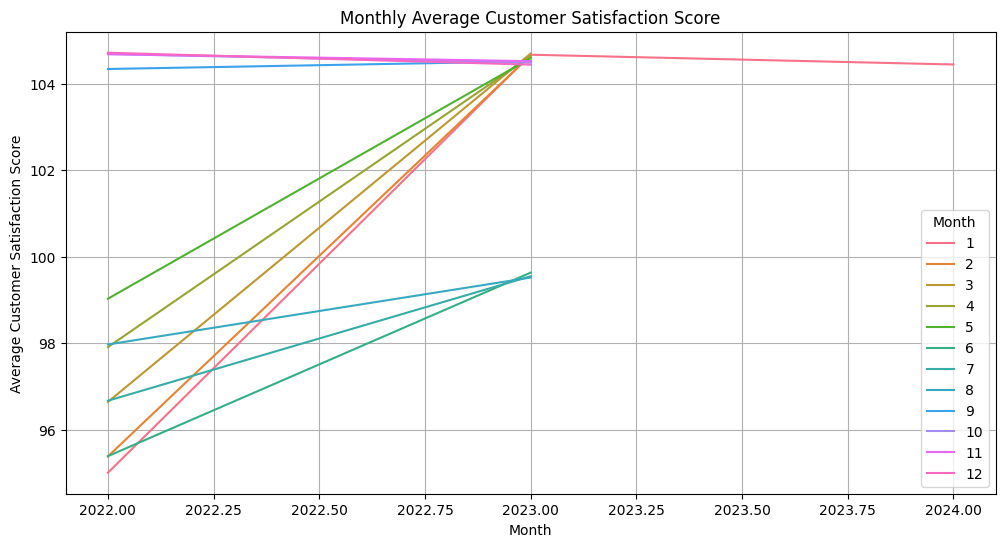

In [ ]:

df['Month'] = df['Booking Date'].dt.month
df['Year'] = df['Booking Date'].dt.year


monthly_satisfaction = df.groupby(['Year', 'Month'])['Customer Satisfaction Score'].mean().unstack()
# print(monthly_satisfaction)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_satisfaction, dashes=False)
plt.title('Monthly Average Customer Satisfaction Score')
plt.xlabel('Month')
plt.ylabel('Average Customer Satisfaction Score')
plt.grid(True)
plt.show()


In [238]:
import pandas as pd

# Get a list of destination columns
destination_columns = df.filter(like='Destination_').columns


results = []

for column in destination_columns:

    temp_df = df[df[column]]


    avg_satisfaction = temp_df['Customer Satisfaction Score'].mean()


    results.append({
        'Destination': column,
        'Average Satisfaction Score': avg_satisfaction
    })


destination_satisfaction = pd.DataFrame(results)


# destination_satisfaction


<ipython-input-222-a675ac42b69b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Satisfaction Score', y='Destination', data=destination_satisfaction, palette='viridis')


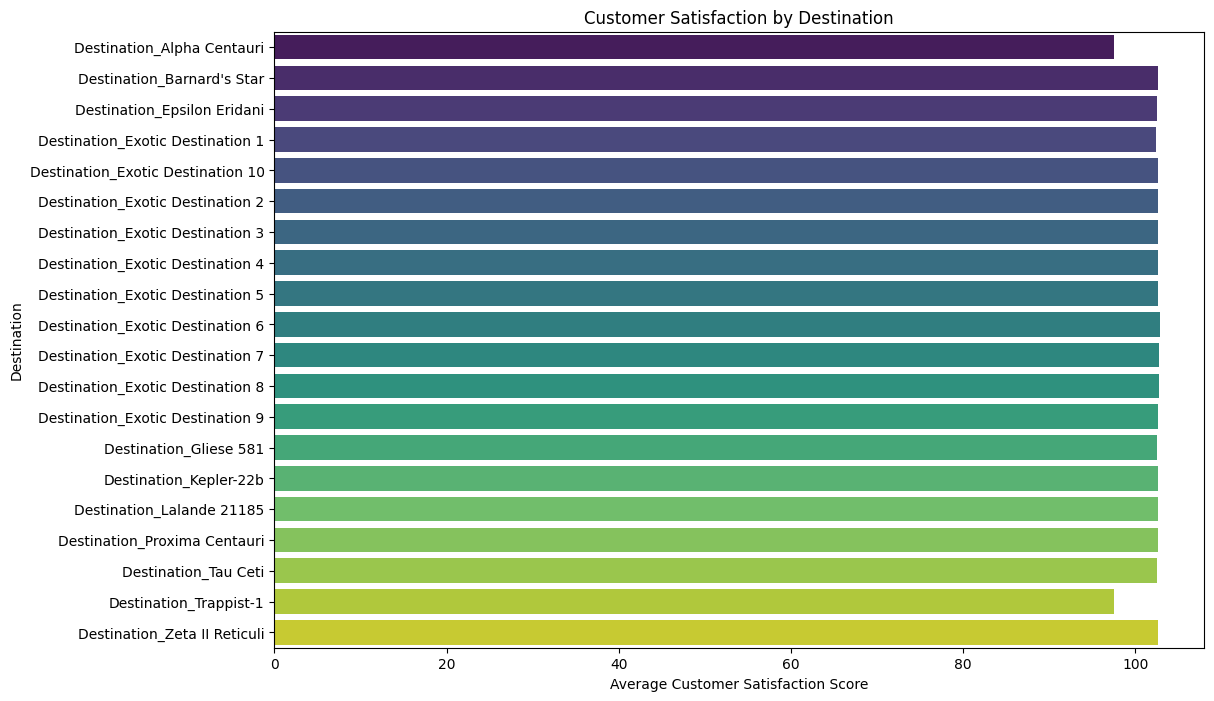

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.barplot(x='Average Satisfaction Score', y='Destination', data=destination_satisfaction, palette='viridis')
plt.title('Customer Satisfaction by Destination')
plt.xlabel('Average Customer Satisfaction Score')
plt.ylabel('Destination')
plt.show()


# Customer Segmentation for Targeted Marketing

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-193-557030737c26>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Segment', data=df, palette='Set2')


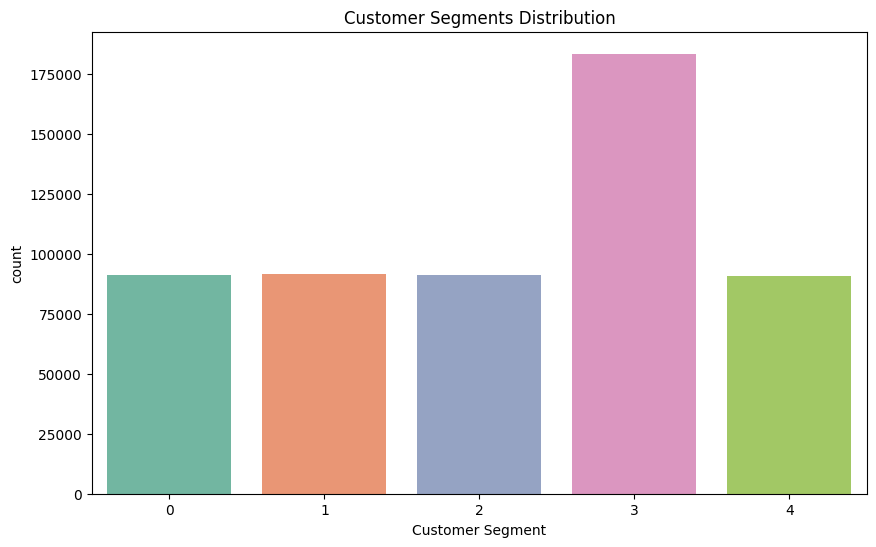

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


features = ['Age', 'Gender Encoded', 'Travel Class Encoded', 'Price (Galactic Credits)',
            'Duration of Stay (Earth Days)', 'Loyalty Program Member Encoded',
            'Purpose_Business', 'Purpose_Colonization', 'Purpose_Research', 'Purpose_Tourism', 'Purpose_Other',
            'Occupation_Businessperson', 'Occupation_Colonist', 'Occupation_Explorer', 'Occupation_Tourist',
            'Occupation_Scientist', 'Occupation_Other']

X = df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=5, random_state=42)
df['Customer Segment'] = kmeans.fit_predict(X_scaled)


cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features)


plt.figure(figsize=(10,6))
sns.countplot(x='Customer Segment', data=df, palette='Set2')
plt.title('Customer Segments Distribution')
plt.show()






In [ ]:
print("Cluster Centers (Customer Personas):")
cluster_df

Cluster Centers (Customer Personas):


,Age,Gender Encoded,Travel Class Encoded,Price (Galactic Credits),Duration of Stay (Earth Days),Loyalty Program Member Encoded,Purpose_Business,Purpose_Colonization,Purpose_Research,Purpose_Tourism,Purpose_Other,Occupation_Businessperson,Occupation_Colonist,Occupation_Explorer,Occupation_Tourist,Occupation_Scientist,Occupation_Other
0,19.483399,1.000000e+00,1.498081,1141.503177,34.079920,0.439768,0.199621,0.201857,0.199489,0.198349,0.200684,1.969258e-13,1.000000e+00,1.890710e-13,2.683687e-13,-3.801126e-13,1.921518e-13
1,51.507900,5.019874e-01,2.001752,931.951317,33.786662,0.681836,0.200072,0.197324,0.199689,0.203532,0.199382,1.000000e+00,1.121880e-13,1.905698e-13,2.687295e-13,-3.805289e-13,1.924294e-13
2,22.373507,3.996803e-13,1.502368,1091.907051,33.976320,0.458755,0.199934,0.198121,0.201945,0.201066,0.198934,1.968148e-13,1.085243e-13,1.000000e+00,2.678413e-13,-3.795575e-13,1.917078e-13
3,20.923076,4.994406e-01,1.501896,1123.577024,34.010502,0.452302,0.200186,0.200486,0.199503,0.199651,0.200175,2.290390e-13,8.973378e-14,1.912914e-13,5.023275e-01,1.091435e-05,4.976616e-01
4,51.509246,3.993472e-13,1.500237,791.482015,33.986866,0.642935,0.200478,0.197857,0.201381,0.200280,0.200004,1.966760e-13,1.060818e-13,1.842693e-13,2.672307e-13,1.000000e+00,1.912082e-13


###**Persona 1: Young Colonist**
**Age**: ~19 years old.  
**Gender**: Predominantly male.  
**Travel Class**: Primarily Economy Class.  
**Price Sensitivity**: Medium, paying around 1,141 Galactic Credits for travel.  
**Duration of Stay**: ~34 days.  
**Loyalty Program Membership**: 43% likely to be a member.  
**Primary Purpose**: Colonization.  
**Occupation**: Colonist.  

### Marketing Strategy:
- Focus on affordable, long-term settlement plans with perks for loyalty program members.
- Highlight community-building activities and resource management in new colonies.

### Derivation Explanation:
I created this persona based on the cluster center values where the average age was around 19, indicating a younger demographic. The **Travel Class Encoded** value suggested that these customers primarily travel in **Economy Class**, and the **Loyalty Program Membership** encoded value of **0.439768** indicated that around **43%** of them are loyalty members. Since their primary purpose of travel is **colonization** and they are mostly **colonists** by occupation, the marketing strategy focuses on settlement plans and community-building activities.
  
---

### **Persona 2: Middle-Aged Businessperson**
**Age**: ~51 years old.  
**Gender**: Mixed.  
**Travel Class**: First Class or Business Class.  
**Price Sensitivity**: Low, willing to pay around 931 Galactic Credits.  
**Duration of Stay**: ~34 days.  
**Loyalty Program Membership**: 68% likely to be a member.  
**Primary Purpose**: Business.  
**Occupation**: Businessperson.  

### Marketing Strategy:
- Offer premium services, such as fast check-in and concierge services.
- Loyalty programs and special offers targeted at frequent travelers, highlighting business class comfort and amenities.

### Derivation Explanation:
For this persona, the cluster data showed that the **average age** was around **51**, identifying this group as middle-aged. The **Travel Class** value was closer to **2**, indicating that these customers prefer **Business or First Class**. Additionally, a high **Loyalty Program Membership** value of **0.681836** suggested that many of them are part of a loyalty program. Since their main **purpose** is **business**, and they are **businesspersons** by occupation, the marketing strategy revolves around luxury and loyalty benefits for frequent travelers.

---

### **Persona 3: Young Explorer**
**Age**: ~22 years old.  
**Gender**: Mixed.  
**Travel Class**: Economy Class.  
**Price Sensitivity**: Moderate, willing to pay around 1,091 Galactic Credits.  
**Duration of Stay**: ~34 days.  
**Loyalty Program Membership**: 45% likely to be a member.  
**Primary Purpose**: Exploration and adventure.  
**Occupation**: Explorer.  

### Marketing Strategy:
- Emphasize adventure travel packages, exploration destinations, and discounted rates for loyalty program members.
- Provide packages tailored to young, adventurous explorers looking for new experiences.

### Derivation Explanation:
This persona is based on a cluster with an average age of **22**, representing younger customers. The **Travel Class Encoded** value was closer to **1**, indicating that these customers prefer **Economy Class** travel. The **Loyalty Program Membership** value was **0.458755**, meaning around **45%** are loyalty members. With **exploration** as the main **purpose of travel** and the **occupation** being primarily **explorer**, I tailored the marketing strategy to adventure and discovery, catering to their need for exploration.

---

### **Persona 4: Young Tourist or Scientist**
**Age**: ~21 years old.  
**Gender**: Mixed.  
**Travel Class**: Economy Class.  
**Price Sensitivity**: Medium, paying around 1,123 Galactic Credits.  
**Duration of Stay**: ~34 days.  
**Loyalty Program Membership**: 45% likely to be a member.  
**Primary Purpose**: Split between tourism and science.  
**Occupation**: Split between tourist and scientist.  

### Marketing Strategy:
- Offer customizable packages for science or tourism, highlighting learning opportunities or vacation experiences.
- Provide group discounts for tourists and specific research opportunities for scientists.

### Derivation Explanation:
This persona comes from a cluster with an average age of **21**, suggesting a younger demographic. The **Travel Class** encoded value was around **1.5**, indicating a preference for **Economy Class**. The **Loyalty Program Membership** value was **0.452302**, meaning around **45%** are loyalty members. The travel purpose was almost equally split between **tourism** and **science**, with occupations varying between **tourists** and **scientists**. Therefore, the marketing strategy focuses on both tourism and scientific research, offering customizable packages for different customer needs.

---

### **Persona 5: Middle-Aged Scientist**
**Age**: ~51 years old.  
**Gender**: Predominantly female or mixed.  
**Travel Class**: Economy Class.  
**Price Sensitivity**: High, paying around 791 Galactic Credits.  
**Duration of Stay**: ~34 days.  
**Loyalty Program Membership**: 64% likely to be a member.  
**Primary Purpose**: Research.  
**Occupation**: Scientist.  

### Marketing Strategy:
- Offer research-focused travel packages with affordable pricing and flexible travel dates.
- Highlight access to scientific facilities and research networks at the destination.
- Provide loyalty benefits such as discounts on future research-related travels.

### Derivation Explanation:
This persona is derived from a cluster with an **average age** of around **51**, indicating a middle-aged demographic. The **Travel Class** encoded value was **1.5**, which indicates a preference for **Economy Class** travel, showing price sensitivity. The **Price** paid was approximately **791 Galactic Credits**, confirming a focus on cost-effective travel options. The **Loyalty Program Membership** encoded value of **0.642935** shows that around **64%** of these customers are loyalty program members. Since their primary **purpose of travel** is **research**, and their **occupation** is mainly **scientist**, the marketing strategy emphasizes affordable travel for research, with a focus on providing scientific resources and loyalty incentives.
